In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder,MinMaxScaler
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from xgboost import XGBRegressor
sns.set()

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
test.drop(['QuoteNumber'],axis=1,inplace=True)
train.drop(['QuoteNumber'],axis=1,inplace=True)


In [5]:
train['Date'] = pd.to_datetime(pd.Series(train['Original_Quote_Date']))
train = train.drop('Original_Quote_Date', axis=1)
test['Date'] = pd.to_datetime(pd.Series(test['Original_Quote_Date']))
test = test.drop('Original_Quote_Date', axis=1)

In [6]:
train['Year'] = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))
train['weekday'] = train['Date'].dt.dayofweek


test['Year'] = test['Date'].apply(lambda x: int(str(x)[:4]))
test['Month'] = test['Date'].apply(lambda x: int(str(x)[5:7]))
test['weekday'] = test['Date'].dt.dayofweek

In [7]:
train = train.drop('Date', axis=1)
test = test.drop('Date', axis=1)

In [8]:
train.head()

,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField84,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField29,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,Geograp

In [9]:
train.shape

(260753, 300)

In [10]:
test.shape

(173836, 299)

# Missing Value Analysis

In [11]:
train.isnull().sum().sort_values()

QuoteConversion_Flag         0
GeographicField17B           0
GeographicField17A           0
GeographicField16B           0
GeographicField16A           0
GeographicField15B           0
GeographicField15A           0
GeographicField18A           0
GeographicField14B           0
GeographicField13B           0
GeographicField13A           0
GeographicField12B           0
GeographicField12A           0
GeographicField11B           0
GeographicField11A           0
GeographicField14A           0
GeographicField18B           0
GeographicField19A           0
GeographicField19B           0
GeographicField27A           0
GeographicField26B           0
GeographicField26A           0
GeographicField25B           0
GeographicField25A           0
GeographicField24B           0
GeographicField24A           0
GeographicField23B           0
GeographicField23A           0
GeographicField22B           0
GeographicField22A           0
GeographicField21B           0
GeographicField21A           0
Geograph

##### The variables with missing values are :
#PropertyField4        -      63
#PropertyField32        -     70
#PropertyField34         -    70
#PropertyField3           -   81
#PersonalField7            - 113
#PropertyField36           - 113
#PropertyField38   -        1220
#PersonalField84    -     124208
#PropertyField29     -    200685

PropertyField36 ,PropertyField38,PersonalField7,'PropertyField4', 'PropertyField3', 'PropertyField34', 'PropertyField32' are all categorical variables with missing values
#Since in all the categorical variables, the mode is 'N', therefore, filling all missing values with 'N'

In [12]:
train['PropertyField36'].value_counts()

N    248302
Y     12338
Name: PropertyField36, dtype: int64

In [13]:
train['PropertyField36'].fillna(value='N',inplace=True)
train['PropertyField38'].fillna(value='N',inplace=True)
train['PersonalField7'].fillna(value='N',inplace=True)
train['PropertyField4'].fillna(value='N',inplace=True)
train['PropertyField3'].fillna(value='N',inplace=True)
train['PropertyField34'].fillna(value='N',inplace=True)
train['PropertyField32'].fillna(value='N',inplace=True)
test['PropertyField36'].fillna(value='N',inplace=True)
test['PropertyField38'].fillna(value='N',inplace=True)
test['PersonalField7'].fillna(value='N',inplace=True)
test['PropertyField4'].fillna(value='N',inplace=True)
test['PropertyField3'].fillna(value='N',inplace=True)
test['PropertyField34'].fillna(value='N',inplace=True)
test['PropertyField32'].fillna(value='N',inplace=True)


In [14]:
train[['PropertyField36','PropertyField38','PersonalField7','PropertyField4','PropertyField3',
       'PropertyField34','PropertyField32']].isnull().sum()

PropertyField36    0
PropertyField38    0
PersonalField7     0
PropertyField4     0
PropertyField3     0
PropertyField34    0
PropertyField32    0
dtype: int64

In [15]:
train['PropertyField29'].isnull().sum()/len(train)

0.7696363991977082

In [16]:
train['PersonalField84'].isnull().sum()/len(train)

0.47634351282631454

PersonaField84 and PropertyField29 have 47% and 76% missing data and so we will drop these two columns from the training data 

In [17]:
train.drop(['PersonalField84','PropertyField29'],axis=1,inplace=True)
test.drop(['PersonalField84','PropertyField29'],axis=1,inplace=True)

# Categorical and numerical Variables

In [18]:
columns=train.columns

In [19]:
train['Field10']=train['Field10'].str.replace(',','').astype('int32')

In [20]:
train.dtypes

QuoteConversion_Flag      int64
Field6                   object
Field7                    int64
Field8                  float64
Field9                  float64
Field10                   int32
Field11                 float64
Field12                  object
CoverageField1A           int64
CoverageField1B           int64
CoverageField2A           int64
CoverageField2B           int64
CoverageField3A           int64
CoverageField3B           int64
CoverageField4A           int64
CoverageField4B           int64
CoverageField5A           int64
CoverageField5B           int64
CoverageField6A           int64
CoverageField6B           int64
CoverageField8           object
CoverageField9           object
CoverageField11A          int64
CoverageField11B          int64
SalesField1A              int64
SalesField1B              int64
SalesField2A              int64
SalesField2B              int64
SalesField3               int64
SalesField4               int64
SalesField5               int64
SalesFie

In [21]:
categorical_var_train=train.select_dtypes('object')
numerical_var_train=train.select_dtypes(['float64','int64','int32'])

In [22]:
categorical_var_train.head()

,Field6,Field12,CoverageField8,CoverageField9,SalesField7,PersonalField7,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PropertyField3,PropertyField4,PropertyField5,PropertyField7,PropertyField14,PropertyField28,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
0,B,N,T,D,V,N,ZA,ZE,XR,XD,N,N,Y,O,C,B,N,N,Y,G,Y,N,N,N,N,CA
1,F,N,T,E,P,N,XB,YJ,YE,XT,N,N,Y,N,B,B,N,O,N,H,Y,N,N,N,N,NJ
2,F,N,T,J,K,N,ZH,XS,YP,XC,Y,Y,Y,R,C,B,N,K,Y,H,Y,N,N,N,N,NJ
3,J,N,Y,F,V,N,XO,XE,YI,XX,N,N,Y,R,C,B,N,O,Y,G,N,N,Y,N,N,TX
4,E,N,T,F,R,N,ZA,ZE,XR,XD,Y,Y,Y,D,A,B,N,O,N,H,N,N,N,N,N,IL


In [23]:
categorical_cols_train=categorical_var_train.columns
numerical_cols_train=numerical_var_train.columns

In [24]:
categorical_cols_train.shape

(26,)

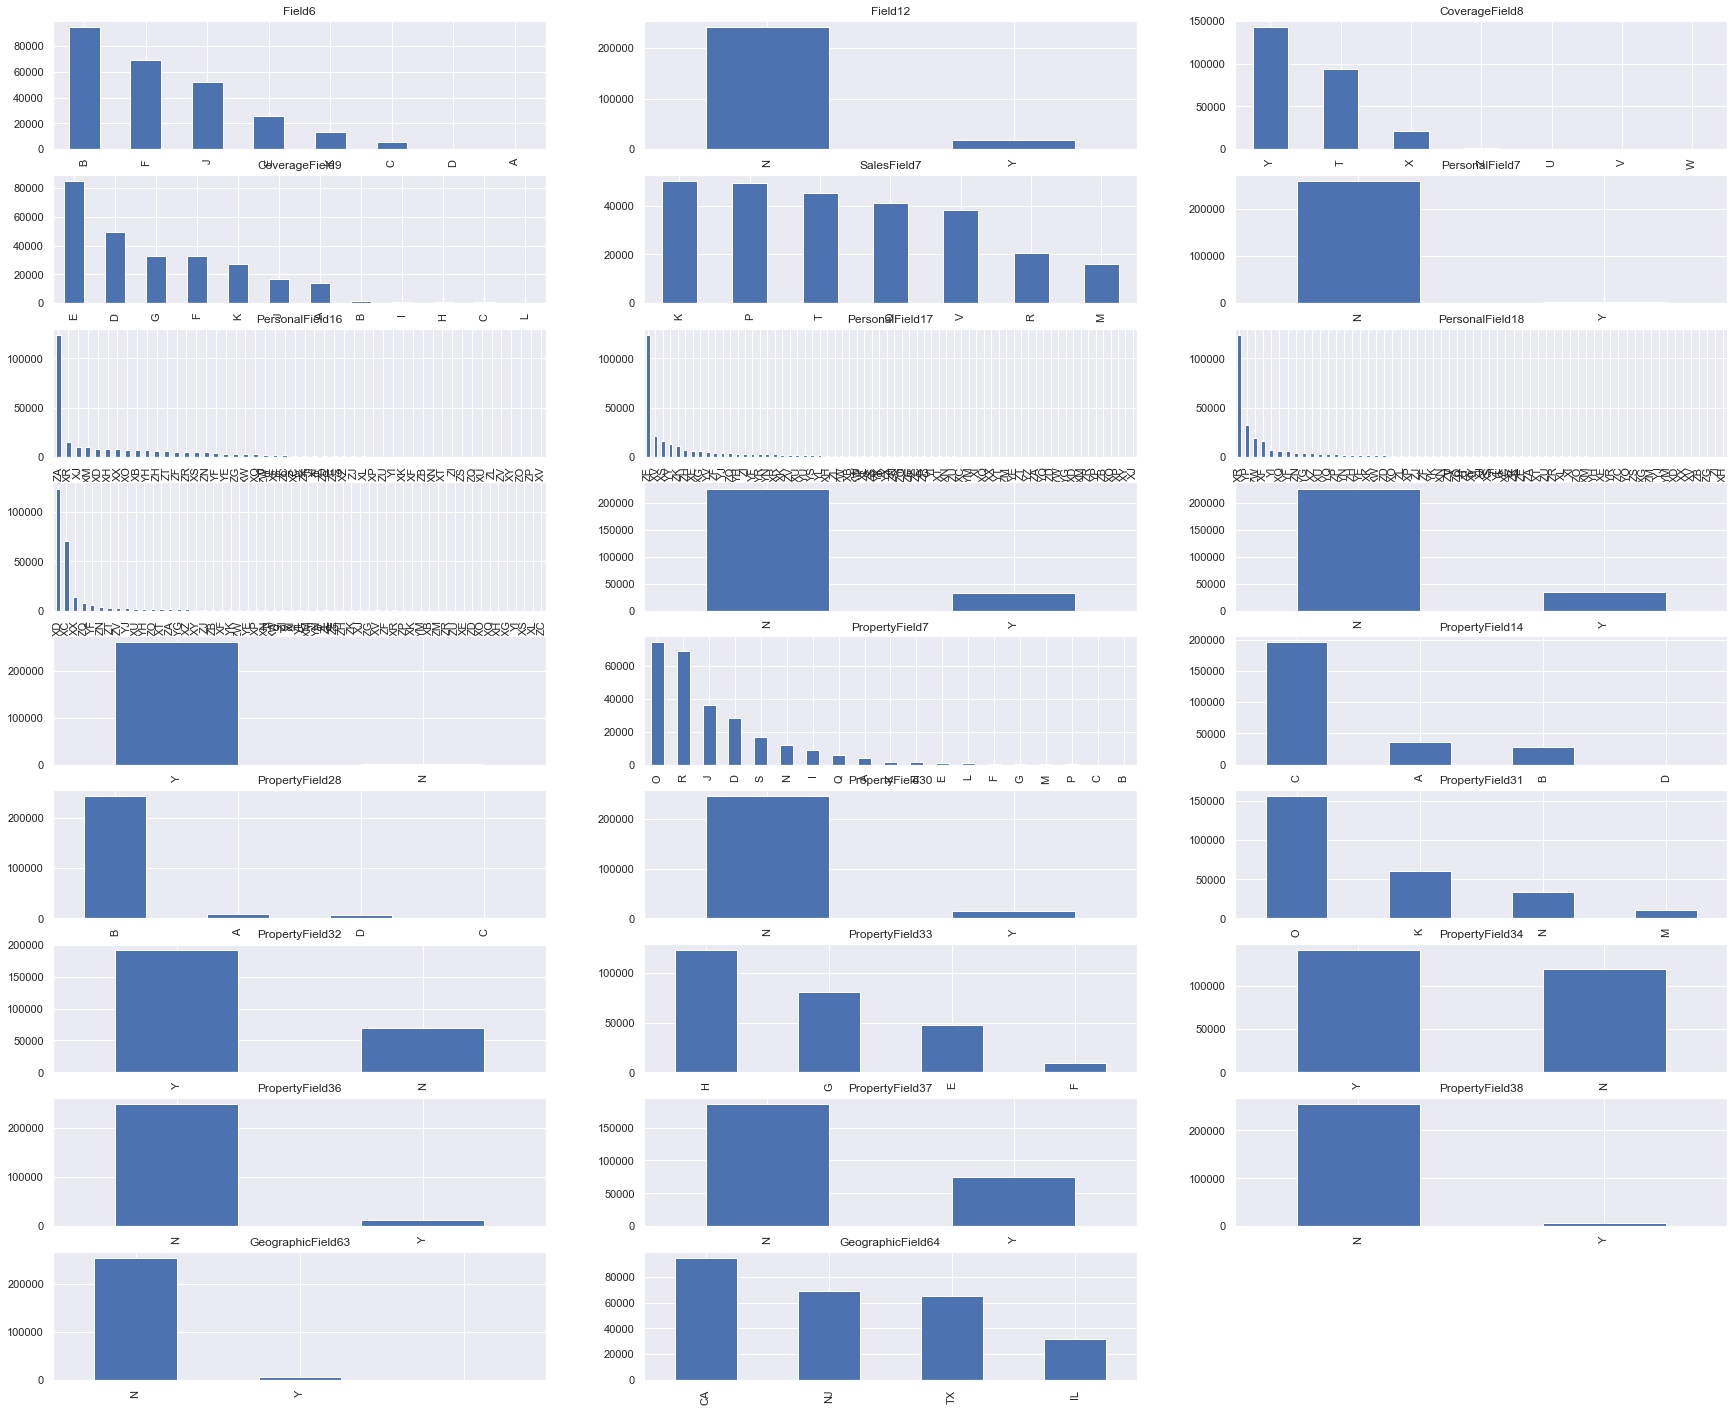

In [25]:
plt.figure(figsize=(30,25))
for i in range(26):
    plt.subplot(9,3,i+1)
    categorical_var_train[categorical_cols_train[i]].value_counts().plot.bar()
    plt.title(categorical_cols_train[i])

In [26]:
LE=LabelEncoder()

In [27]:
for i in range(26):
    train[categorical_cols_train[i]]=LE.fit_transform(train[categorical_cols_train[i]])   
    

#### Since the categorical variables in test are different so we will sperately label encode them

In [28]:
categorical_var_test=test.select_dtypes('object')
categorical_cols_test=categorical_var_test.columns
categorical_cols_test.shape

(27,)

In [29]:
numerical_var_test=test.select_dtypes(['int32','int64','float64'])
numerical_cols_test=numerical_var_test.columns

In [30]:
for i in range(27):
    test[categorical_cols_test[i]]=LE.fit_transform(test[categorical_cols_test[i]].astype('str'))   
    

In [31]:
test[categorical_cols_test].head()

,Field6,Field10,Field12,CoverageField8,CoverageField9,SalesField7,PersonalField7,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PropertyField3,PropertyField4,PropertyField5,PropertyField7,PropertyField14,PropertyField28,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
0,4,3,0,5,10,2,0,25,13,14,48,0,0,1,2,0,1,0,2,1,2,0,0,2,0,2,1
1,5,5,0,0,4,4,0,23,14,34,1,0,0,1,8,0,1,0,3,1,3,0,0,1,0,1,2
2,5,5,0,0,4,6,0,3,49,29,45,0,0,1,16,2,1,0,1,1,2,1,0,1,0,1,2
3,7,0,1,5,5,4,0,15,40,17,1,0,0,1,15,2,1,0,1,0,2,0,0,1,0,1,3
4,1,6,0,5,3,5,0,27,46,15,2,0,0,1,16,2,1,0,3,1,3,0,1,1,0,1,0


In [32]:
numerical_var_train.describe()

,QuoteConversion_Flag,Field7,Field8,Field9,Field10,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField6,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField35,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,GeographicField40A,GeographicField40B,GeographicField41A,GeographicField41B,GeographicField42A,GeographicField42B,GeographicField43A,GeographicField43B,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField

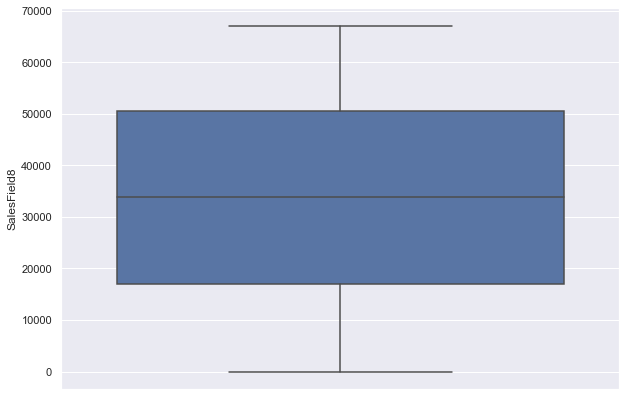

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(numerical_var_train['SalesField8'],orient='v')

In [34]:
train.head()

,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,G

## Train test split

In [35]:
x=train.drop(['QuoteConversion_Flag'],axis=1)
y=train['QuoteConversion_Flag']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Naive Bayes Classifier


In [37]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [38]:
Model1=GaussianNB()

In [39]:
Model1.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
pred1=Model1.predict(x_test)

In [41]:
error1=y_test-pred1

In [42]:
error1.value_counts()

 0    46364
-1    29319
 1     2543
Name: QuoteConversion_Flag, dtype: int64

In [43]:
Accuracy=(46698/78226)*100
Accuracy

59.69626466903587

#### Our accuracy is very low here, so we will try some other things to increase it

## Scaling the numerical columns in range (0,1) and checking naive bayes accuracy

In [44]:
numerical_var_train_x=numerical_var_train.drop(['QuoteConversion_Flag'],axis=1)
numerical_cols_train_x=numerical_var_train_x.columns

In [45]:
x_scaled=x.copy()
x_scaled[numerical_cols_train_x]=pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(x_scaled[numerical_cols_train_x]),columns=numerical_cols_train_x)

In [46]:
test[numerical_cols_test]=pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(test[numerical_cols_test]),columns=numerical_cols_test)

In [47]:
x_scaled.head()

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,Geo

In [48]:
test.head()

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,Geo

1.Now i will be using the scaled x values in the model.

  2.First let split the data into train and test.
  
  3.The variable names followed by "_s" denotes the scaled variables

In [52]:
x_train_s,x_test_s,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

#### Multinomial NB

In [53]:
model2=MultinomialNB()

In [54]:
model2.fit(x_train_s,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
pred2=model2.predict(x_test_s)

In [56]:
error2=y_test-pred2

In [57]:
error2.value_counts()

 0    59696
-1    11902
 1     6628
Name: QuoteConversion_Flag, dtype: int64

In [58]:
Accuracy2=(59865/(59865+11449+6912))*100
Accuracy2

76.52826425996471

**Accuracy is 76.52% for the Multinomial NB classifier**

#### Gaussian NB

In [59]:
model3=GaussianNB()

In [60]:
model3.fit(x_train_s,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
pred3=model3.predict(x_test_s)

In [62]:
error3=y_test-pred3

In [63]:
error3.value_counts()

 0    63982
 1    12692
-1     1552
Name: QuoteConversion_Flag, dtype: int64

In [64]:
Accuracy3=64019/(12650+1557+64019)*100
Accuracy3

81.83851916242682

**1.The accuracy for Gaussian NB is 81.83%**

**2.Hence we will use the Gaussian NB for this data**

In [65]:
from sklearn.model_selection import KFold, cross_val_score

In [66]:
kf=KFold(n_splits=10,shuffle=True,random_state=1)

In [67]:
cv_scores=cross_val_score(model3,x_scaled,y,cv=kf)


In [68]:
cv_scores

array([0.81764841, 0.81956588, 0.81622948, 0.82128476, 0.81430489,
       0.81959732, 0.81856184, 0.82481304, 0.81518696, 0.82013423])

In [69]:
cv_scores.mean()

0.8187326809442771

**Our Average model accuracy is 81.86%**

In [70]:
x.head()

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,Geo

The continuous variables in x are: Field8, Field11, SalesField8

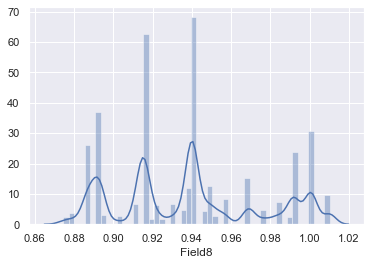

In [71]:
sns.distplot(x['Field8'])

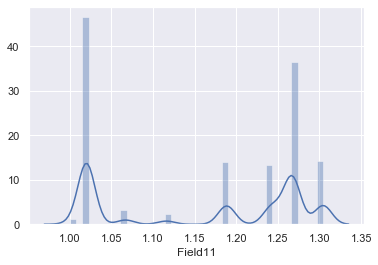

In [72]:
sns.distplot(x['Field11'])

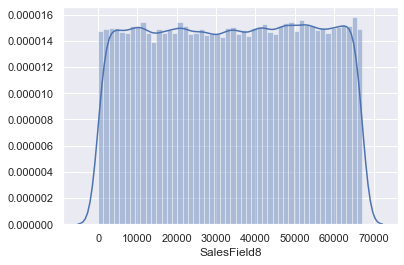

In [73]:
sns.distplot(x['SalesField8'])

Now lets drop Field8, Field11, SalesField8 from x and see if it improves our accuracy

In [74]:
x_train_s_new=x_train_s.drop(['Field8','Field11','SalesField8'],axis=1)
x_test_s_new=x_test_s.drop(['Field8', 'Field11', 'SalesField8'],axis=1)




In [75]:
model4=GaussianNB()
model4.fit(x_train_s_new,y_train)
pred4=model4.predict(x_test_s_new)
error4=y_test-pred4
error4.value_counts()

 0    63975
 1    12707
-1     1544
Name: QuoteConversion_Flag, dtype: int64

In [76]:
model4.score(x_test_s_new,y_test)

0.8178227187891494

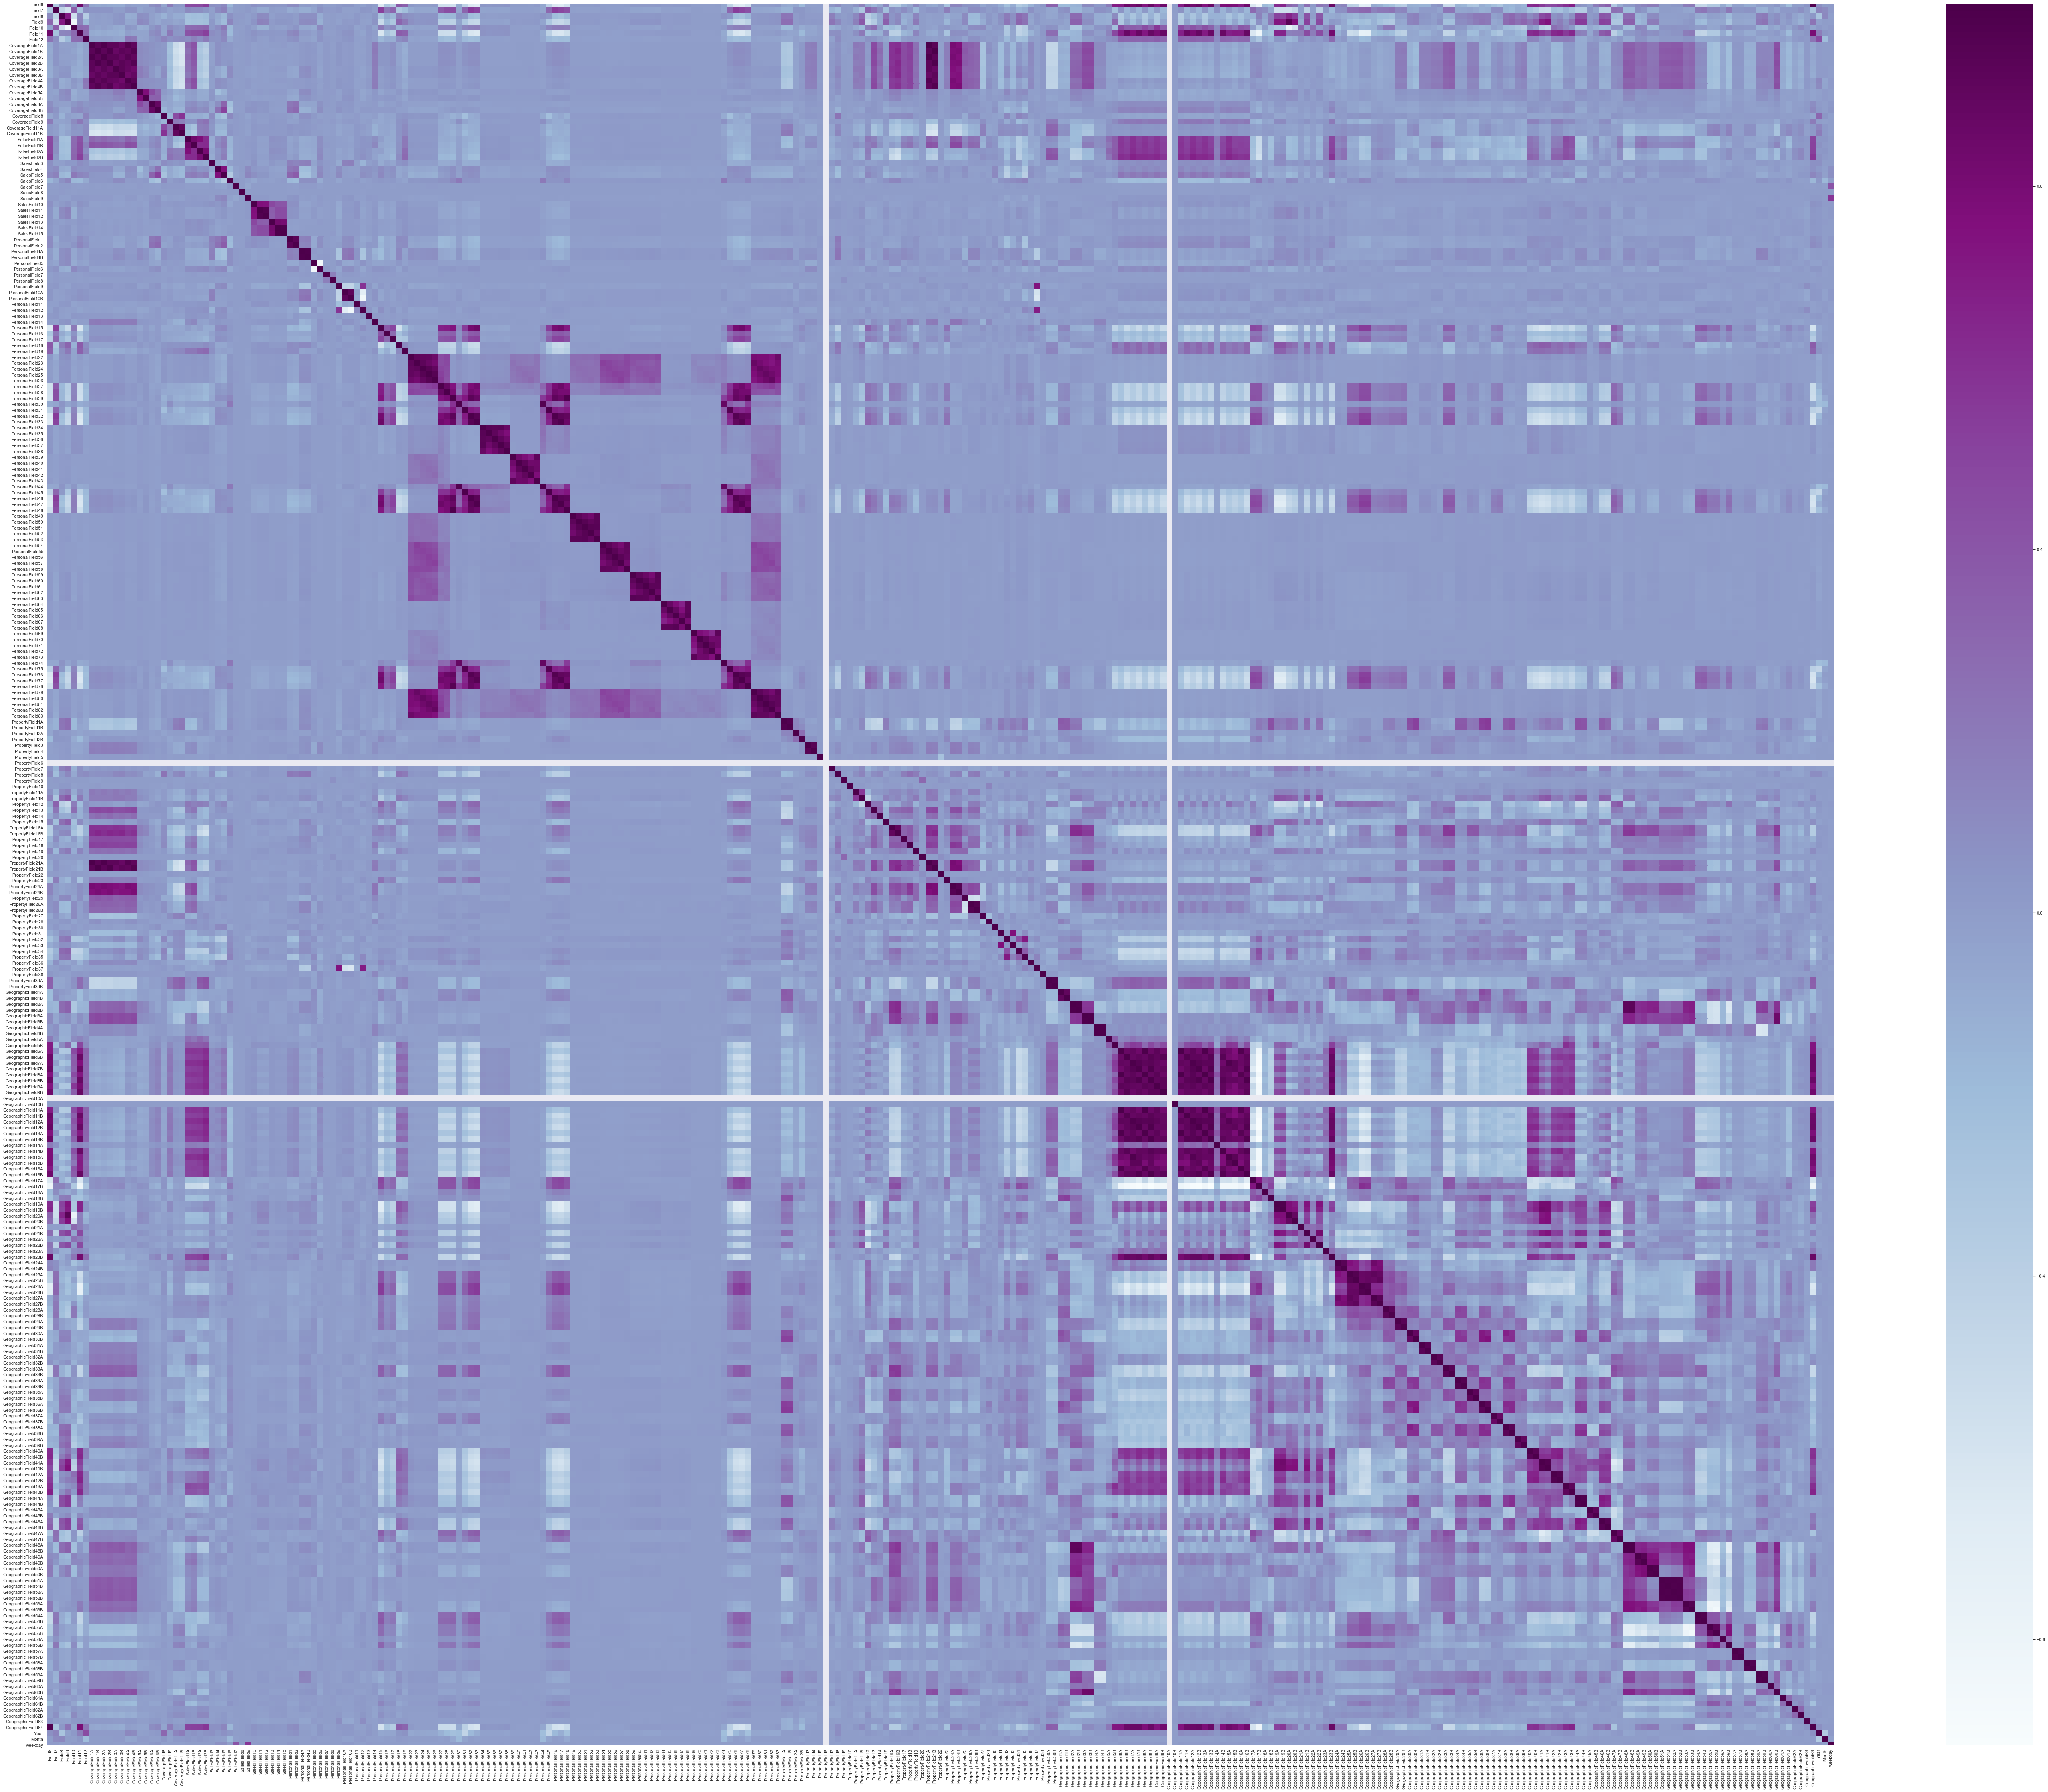

In [77]:
plt.figure(figsize=(100,80))
sns.heatmap(x.corr(),cmap='BuPu')

In [78]:
finalmodel=GaussianNB()
finalmodel.fit(x_scaled,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
test_predictions=pd.DataFrame(finalmodel.predict(test),columns=['QuoteConversion_Flag'])

In [80]:
test_new=pd.read_csv('test.csv')

In [81]:
test_predictions['QuoteNumber']=test_new['QuoteNumber']

In [82]:
test_predictions

,QuoteConversion_Flag,QuoteNumber
0,0,3
1,0,5
2,0,7
3,0,9
4,0,10
...,...,...
173831,0,434570
173832,0,434573
173833,0,434574
173834,0,434575


In [83]:
test_predictions.to_csv('submission_NB.csv',index=False)

# Random forest classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=200)

In [85]:
randomforest.fit(x_train_s,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
randomforest.score(x_test_s,y_test)

0.9161404136732033

In [87]:
finalmodel_rfc=RandomForestClassifier(n_estimators=200)
finalmodel_rfc.fit(x_scaled,y)
test_predictions_rfc=pd.DataFrame(finalmodel_rfc.predict(test),columns=['QuoteConversion_Flag'])
test_predictions_rfc['QuoteNumber']=test_new['QuoteNumber']
test_predictions_rfc.to_csv('submission_RFC.csv',index=False)

# XGB Classifier

In [88]:
from xgboost import XGBClassifier

In [89]:
xgbclassifier=XGBClassifier(n_estimators=25,
                        nthread=-1,
                        max_depth=10,
                        learning_rate=0.025,
                        silent=True,
                        subsample=0.8,
                        colsample_bytree=0.8)

In [90]:
xgbclassifier.fit(x_train_s,y_train,early_stopping_rounds=5,eval_set=[(x_test_s,y_test)],verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.025, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)

In [91]:
xgbclassifier.score(x_test_s,y_test)

0.921650090762662

In [92]:
finalmodel_xgb=XGBClassifier(n_estimators=25,nthread=-1,max_depth=10,learning_rate=0.025,silent=True,subsample=0.8,colsample_bytree=0.8)
finalmodel_xgb.fit(x_scaled,y)
test_predictions_xgb=pd.DataFrame(finalmodel_xgb.predict(test),columns=['QuoteConversion_Flag'])
test_predictions_xgb['QuoteNumber']=test_new['QuoteNumber']
test_predictions_xgb.to_csv('submission_xgb.csv',index=False)